In [13]:
import os
import pandas as pd
import numpy as np
import zipfile
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [14]:
if not os.path.exists('abstracts.tsv'):
    with zipfile.ZipFile('abstracts.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

abstracts_df = pd.read_csv('abstracts.tsv',  delimiter='\t')
abstracts_df.head(3)

,Unnamed: 0,001,01,05,10,100,11,12,12 healthy,13,...,young,young adults,young healthy,young older,younger,younger adults,youth,zone,journal,citation_count
0,9065511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Journal of neuroscience : the official jou...,180.0
1,9084599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Journal of neurophysiology,464.0
2,9114263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Journal of neurophysiology,367.0


In [3]:
abstracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Columns: 3231 entries, Unnamed: 0 to citation_count
dtypes: float64(3229), int64(1), object(1)
memory usage: 354.3+ MB


In [4]:
na_counts = abstracts_df.isna().sum()
na_counts = na_counts[na_counts > 0]

na_counts

citation_count    5
dtype: int64

In [15]:
abstracts_df.rename(columns={'Unnamed: 0' : 'id'}, inplace=True)
abstracts_df = abstracts_df.dropna(subset=['citation_count'])

abstracts_df['journal_lower'] = abstracts_df['journal'].str.lower()
abstracts_df = abstracts_df.drop(['journal'], axis=1)
abstracts_df = abstracts_df.rename(columns={'journal_lower': 'journal'})

In [6]:
abstracts_df.describe()

,id,001,01,05,10,100,11,12,12 healthy,13,...,yielded,young,young adults,young healthy,young older,younger,younger adults,youth,zone,citation_count
count,1.436600e+04,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,...,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000,14366.000000
mean,2.175643e+07,0.001099,0.001024,0.002233,0.004447,0.001040,0.002557,0.003911,0.000691,0.002459,...,0.001593,0.005004,0.002204,0.000559,0.000654,0.002131,0.001009,0.001308,0.000717,85.675136
std,4.418583e+06,0.011990,0.011147,0.016923,0.021742,0.011449,0.016332,0.018836,0.008137,0.015114,...,0.012127,0.025061,0.015682,0.008031,0.010309,0.020094,0.013362,0.019659,0.011539,203.796848
min,9.065511e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.859997e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,2.217177e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,2.517382e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.750000
max,2.984501e+07,0.315941,0.279121,0.467715,0.735705,0.445196,0.467234,0.289897,0.200938,0.292099,...,0.262623,0.357259,0.334029,0.345307,0.404375,0.375561,0.353760,0.682188,0.384085,9231.000000


Plotting citation_count to grasp the distribution of the data: 

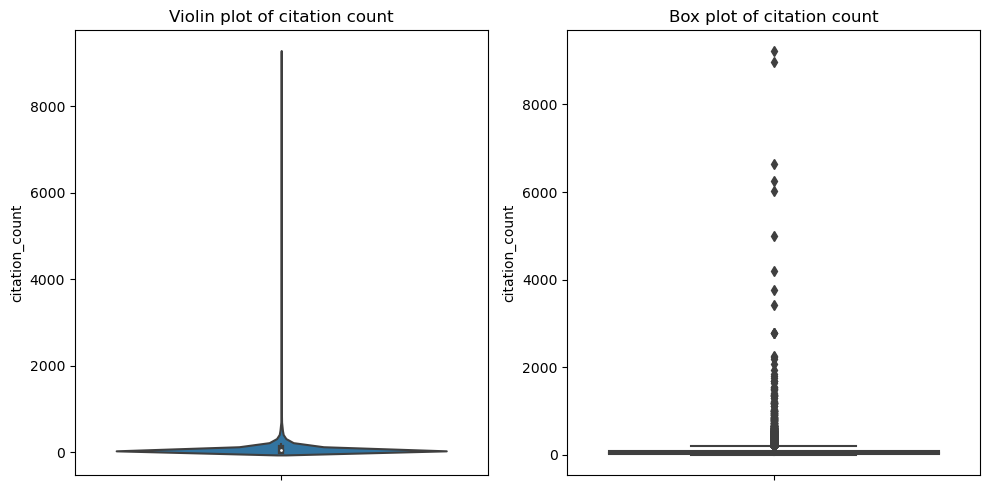

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Violin plot
sns.violinplot(y=abstracts_df['citation_count'], ax=axs[0])
axs[0].set_title('Violin plot of citation count')

# Box plot
sns.boxplot(y=abstracts_df['citation_count'], ax=axs[1])
axs[1].set_title('Box plot of citation count')

plt.tight_layout()
plt.show()

Considering the percentiles data from the describe() method output and integrating it with the plots visualization, we can observe that 75% of the data points has a citation count <= 100.  
There is a long tail extending up to 9000 which indicates that there are different values along this range, but from the output and the density in the but they are less then 25% of the data.   
The box plot visualizes the distribution of the data points with the higher citation_count values along that range.   
Let's further investigate the distribution of the higher ciation_count samples using a histogram:

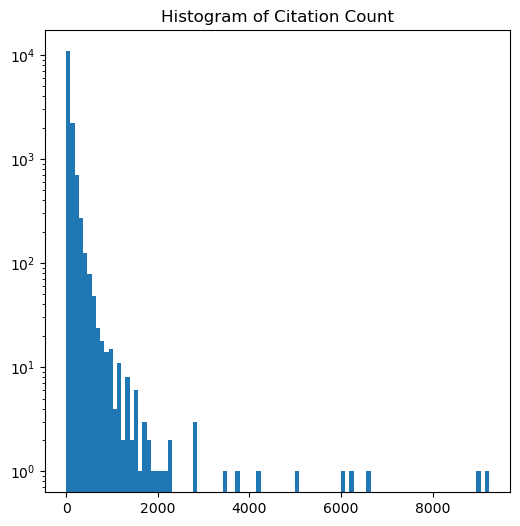

In [8]:
plt.figure(figsize=(6, 6))
plt.hist(abstracts_df['citation_count'], bins=100, log=True)
plt.title('Histogram of Citation Count')
plt.show()

We can observe that the distriubtion is right-skewed, with outliers at the range of 4000 and above.

Dropping Stop Words Columns:

In [17]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
columns_with_stopwords = [col for col in abstracts_df.columns if col in stop_words]
abstracts_df.drop(columns_with_stopwords, axis=1)

abstracts_df = abstracts_df.drop(['et', 'al', 'et al'], axis=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chenr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
abstracts_df.to_csv('abstracts_df_eda.csv')

with zipfile.ZipFile('abstracts_df_eda.zip', 'w') as zf:
    zf.write('abstracts_df_eda.csv')

os.remove('abstracts_df_eda.csv')    
